In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
df = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [260]:
df.isna().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [261]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
rear_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
front_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
internal_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [262]:
df['rear_camera_mp']=df['rear_camera_mp'].fillna(df['rear_camera_mp'].median())
df['front_camera_mp']=df['front_camera_mp'].fillna(df['front_camera_mp'].median())
df['internal_memory']=df['internal_memory'].fillna(df['internal_memory'].median())
df['ram']=df['ram'].fillna(df['ram'].median())
df['battery']=df['battery'].fillna(df['battery'].median())
df['weight']=df['weight'].fillna(df['weight'].median())

In [263]:
df.isna().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

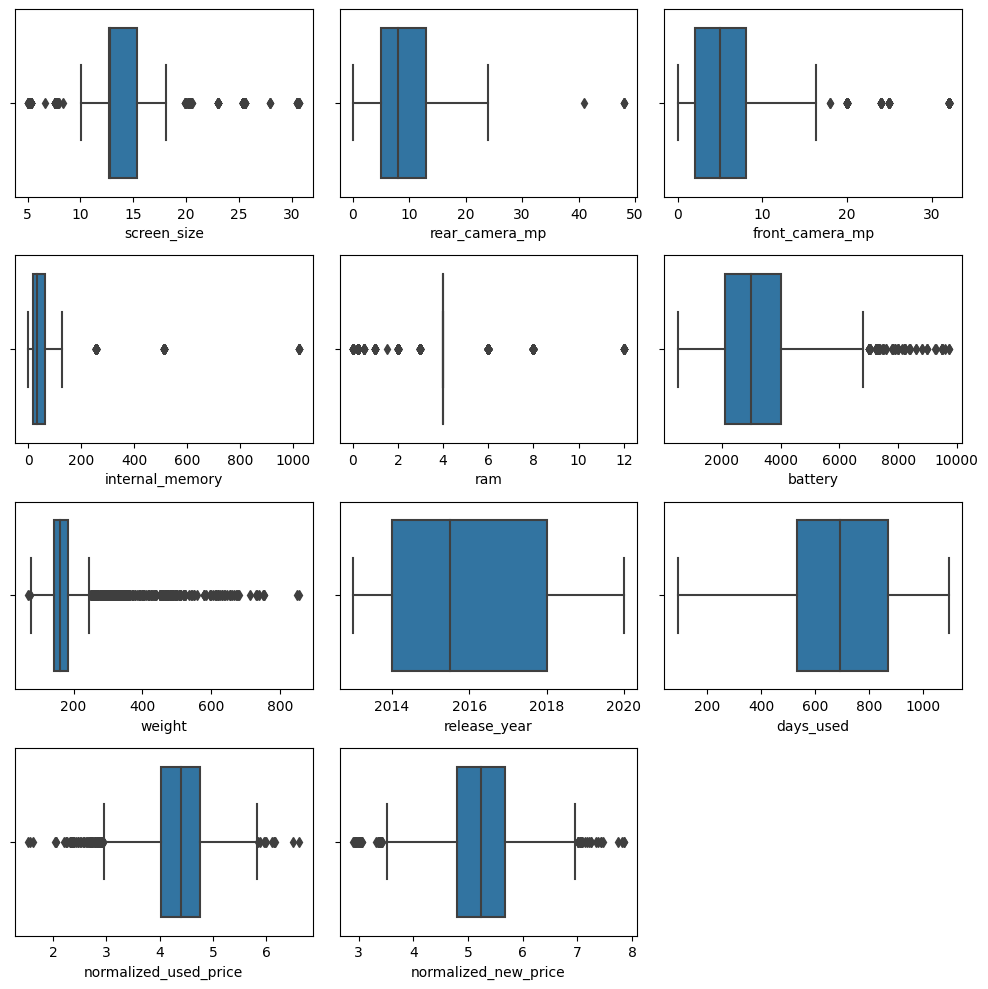

In [264]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [265]:
outlier_ram= df[df['ram']<1]
outlier_ram

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
65,Lava,Android,12.70,no,no,5.00,0.3,8.00,0.50,3000.0,147.60,2016,819,3.495598,4.113003
96,LG,Android,7.62,no,no,2.00,1.3,4.00,0.50,1540.0,140.45,2014,750,3.027715,3.925926
103,Micromax,Android,10.16,no,no,2.00,0.3,0.50,0.25,1500.0,146.50,2014,1016,3.043570,3.926715
104,Micromax,Android,7.75,no,no,0.30,0.3,0.50,0.25,1500.0,89.00,2014,956,2.386926,3.664843
105,Micromax,Android,10.03,no,no,2.00,0.3,0.20,0.25,2000.0,85.00,2013,680,2.856470,4.244631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Others,Android,10.16,no,no,5.00,1.3,512.00,0.25,2500.0,112.00,2015,543,3.073619,3.913422
2802,Others,Others,5.13,no,no,2.00,2.0,128.00,0.25,2100.0,110.00,2014,927,3.780319,4.107590
3166,ZTE,Android,10.16,no,no,3.15,5.0,512.00,0.25,1400.0,120.00,2014,1006,3.173878,4.096176
3246,Nokia,Others,5.28,yes,no,2.00,0.0,0.06,0.03,1500.0,118.00,2019,339,3.417071,4.085304


In [266]:
df.drop(outlier_ram.index, inplace =True)

In [267]:
df[df['ram']<1]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price


In [268]:
df[(df['4g']=='no') & (df['5g']=='no')]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
21,Others,Android,20.32,no,no,8.00,0.3,16.0,1.0,5680.0,453.6,2013,933,4.452136,5.484382
57,Huawei,Android,10.16,no,no,5.00,2.0,16.0,4.0,1700.0,136.1,2014,666,3.579344,4.703113
58,Huawei,Android,17.78,no,no,3.15,0.3,8.0,1.0,4100.0,350.0,2013,819,3.982295,5.016551
67,Lenovo,Android,25.43,no,no,8.00,5.0,64.0,4.0,7000.0,580.0,2019,419,5.214881,5.775141
106,Micromax,Android,10.16,no,no,2.00,0.3,16.0,4.0,2000.0,89.0,2013,733,3.108614,4.094844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,ZTE,Android,10.29,no,no,8.00,0.3,16.0,4.0,2000.0,146.0,2013,939,3.617920,4.710971
3181,ZTE,Android,12.70,no,no,8.00,1.3,16.0,4.0,2500.0,163.0,2013,829,4.008242,5.296816
3182,ZTE,Android,10.16,no,no,5.00,0.3,16.0,4.0,1600.0,140.0,2013,885,3.674273,5.012966
3184,ZTE,Android,10.16,no,no,3.15,1.0,16.0,4.0,1600.0,140.0,2013,782,3.745023,4.860975


In [269]:
df['4g']=df['4g'].replace({'yes': 1, 'no': 0})
df['5g']=df['5g'].replace({'yes': 1, 'no': 0})

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3327 non-null   object 
 1   os                     3327 non-null   object 
 2   screen_size            3327 non-null   float64
 3   4g                     3327 non-null   int64  
 4   5g                     3327 non-null   int64  
 5   rear_camera_mp         3327 non-null   float64
 6   front_camera_mp        3327 non-null   float64
 7   internal_memory        3327 non-null   float64
 8   ram                    3327 non-null   float64
 9   battery                3327 non-null   float64
 10  weight                 3327 non-null   float64
 11  release_year           3327 non-null   int64  
 12  days_used              3327 non-null   int64  
 13  normalized_used_price  3327 non-null   float64
 14  normalized_new_price   3327 non-null   float64
dtypes: f

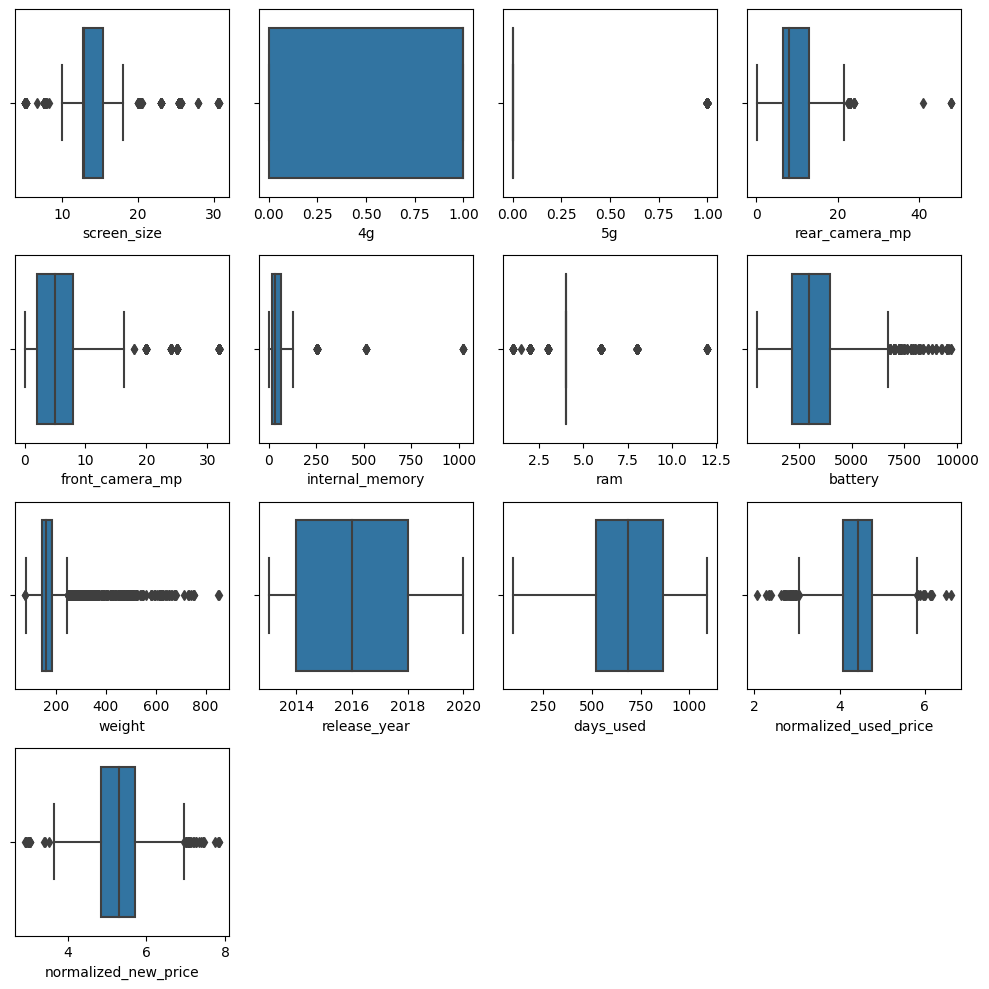

In [271]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [272]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,1,0,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [273]:
df[df['internal_memory']<2]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,0,0,0.3,0.0,0.06,4.0,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,0,0,0.3,0.0,0.10,4.0,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,0,0,0.3,0.0,0.06,4.0,3000.0,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,0,0,5.0,0.0,0.06,4.0,1200.0,111.4,2013,1001,3.827771,4.605770


In [274]:
df[df['screen_size']>15]

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,1,0,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,Asus,Android,16.74,1,0,8.0,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,1,0,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829


In [275]:
OS_count=df.groupby(['os']).count()
OS_count

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
os,,,,,,,,,,,,,,
Android,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160,3160
Others,64,64,64,64,64,64,64,64,64,64,64,64,64,64
Windows,67,67,67,67,67,67,67,67,67,67,67,67,67,67
iOS,36,36,36,36,36,36,36,36,36,36,36,36,36,36


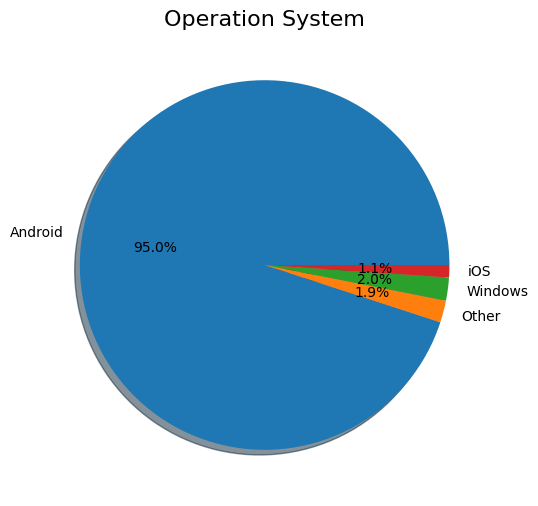

In [276]:
plt.figure(figsize=(8,6))
plt.pie(OS_count['4g'], labels=('Android','Other','Windows','iOS'), autopct = '%1.1f%%', shadow= True)
plt.title("Operation System", fontsize=16)
plt.show()

In [277]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [278]:
df['device_brand'].value_counts()

Others        477
Samsung       339
Huawei        249
LG            198
Lenovo        169
ZTE           139
Xiaomi        132
Oppo          129
Asus          122
Vivo          116
Honor         116
Alcatel       111
HTC           110
Micromax      107
Motorola      106
Sony           86
Nokia          71
Meizu          62
Gionee         55
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           30
Spice          28
Karbonn        24
Coolpad        22
OnePlus        22
Microsoft      22
BlackBerry     21
Google         15
Celkon         12
Infinix        10
Name: device_brand, dtype: int64

In [279]:
df_encoded = pd.get_dummies(df, columns=['device_brand','os'])

In [280]:
df_encoded

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,...,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,...,0,0,0,0,0,0,1,0,0,0
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,...,0,0,0,0,0,0,1,0,0,0
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,...,0,0,0,0,0,0,1,0,0,0
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,1,0,8.0,8.0,64.0,6.0,5000.0,190.0,2019,...,0,0,0,0,0,0,1,0,0,0
3450,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,...,0,0,0,0,0,0,1,0,0,0
3451,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,...,0,0,0,0,0,0,1,0,0,0
3452,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,...,0,0,0,0,0,0,1,0,0,0


In [281]:
df.corr()

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.196644,0.163019,0.043402,0.235591,0.202085,0.118502,0.804651,0.840858,0.350162,-0.297614,0.570628,0.387091
4g,0.196644,1.000000,0.143331,0.502222,0.469706,0.201984,0.138345,0.356833,-0.025138,0.601575,-0.351698,0.519065,0.426356
5g,0.163019,0.143331,1.000000,-0.019729,0.388945,0.332504,0.657038,0.201237,0.055960,0.357151,-0.366012,0.332557,0.331566
rear_camera_mp,0.043402,0.502222,-0.019729,1.000000,0.345326,0.122859,0.059394,0.166964,-0.139027,0.278084,-0.095471,0.500167,0.454336
front_camera_mp,0.235591,0.469706,0.388945,0.345326,1.000000,0.426909,0.468418,0.344895,-0.029086,0.691157,-0.556599,0.613695,0.456463
internal_memory,0.202085,0.201984,0.332504,0.122859,0.426909,1.000000,0.422058,0.239540,0.064507,0.387984,-0.351199,0.430586,0.400086
ram,0.118502,0.138345,0.657038,0.059394,0.468418,0.422058,1.000000,0.181882,0.014607,0.283092,-0.293678,0.400650,0.428335
battery,0.804651,0.356833,0.201237,0.166964,0.344895,0.239540,0.181882,1.000000,0.694401,0.477488,-0.371065,0.595754,0.429253
weight,0.840858,-0.025138,0.055960,-0.139027,-0.029086,0.064507,0.014607,0.694401,1.000000,0.053510,-0.060953,0.368063,0.239155
release_year,0.350162,0.601575,0.357151,0.278084,0.691157,0.387984,0.283092,0.477488,0.053510,1.000000,-0.751820,0.516087,0.280369


In [282]:
df_encoded.columns

Index(['screen_size', '4g', '5g', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'release_year',
       'days_used', 'normalized_used_price', 'normalized_new_price',
       'device_brand_Acer', 'device_brand_Alcatel', 'device_brand_Apple',
       'device_brand_Asus', 'device_brand_BlackBerry', 'device_brand_Celkon',
       'device_brand_Coolpad', 'device_brand_Gionee', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_Infinix', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'dev

In [283]:
df_encoded=df_encoded.drop(['device_brand_Acer', 'device_brand_Alcatel','device_brand_Asus','device_brand_Celkon','device_brand_Coolpad', 'device_brand_Gionee','device_brand_Infinix', 'device_brand_Karbonn','device_brand_Lava','device_brand_Micromax', 'device_brand_Microsoft','device_brand_Others', 'device_brand_Panasonic','device_brand_Sony',
       'device_brand_Spice','device_brand_XOLO','device_brand_ZTE'],axis=1)

In [284]:
df_encoded=df_encoded[['device_brand_Apple', 'device_brand_BlackBerry', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_LG', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Realme', 'device_brand_Samsung',
       'device_brand_Vivo', 'device_brand_Xiaomi','os_Android', 'os_Others',
       'os_Windows', 'os_iOS','screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used','normalized_new_price', 'normalized_used_price' ]]

In [285]:
df_encoded.columns

Index(['device_brand_Apple', 'device_brand_BlackBerry', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_LG', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Realme', 'device_brand_Samsung',
       'device_brand_Vivo', 'device_brand_Xiaomi', 'os_Android', 'os_Others',
       'os_Windows', 'os_iOS', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_new_price',
       'normalized_used_price'],
      dtype='object')

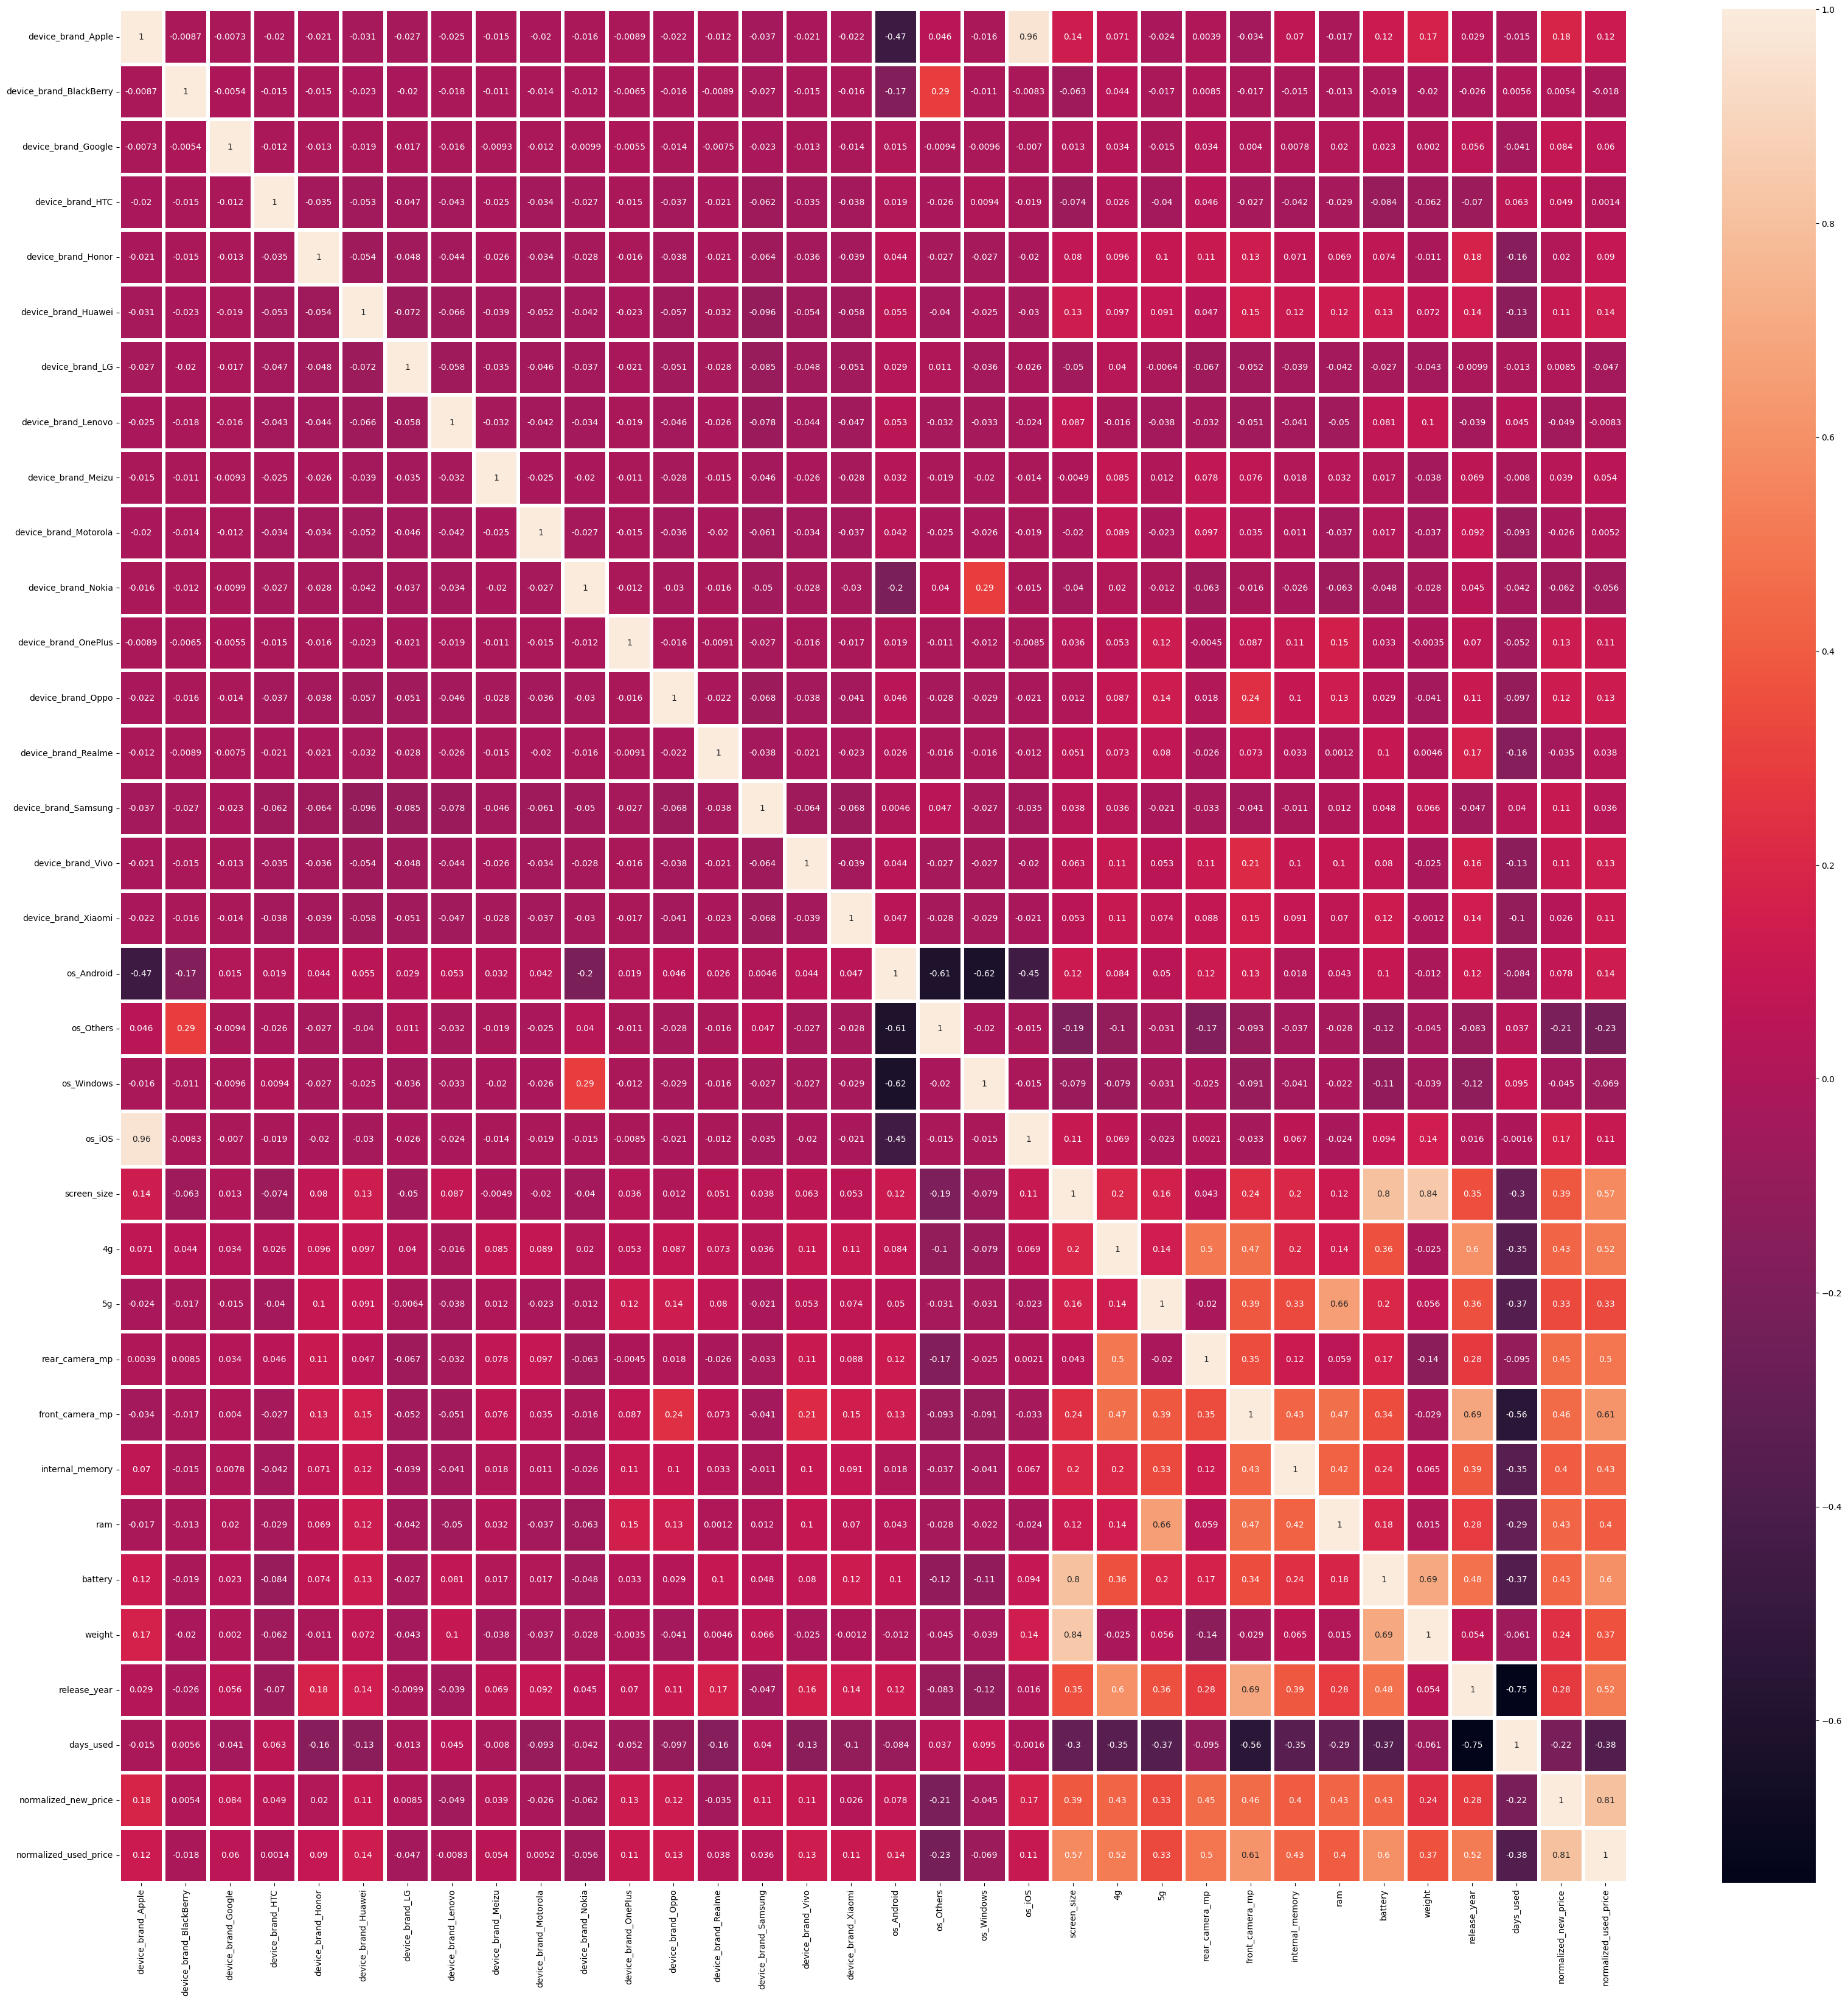

In [286]:
hm = plt.figure(figsize=(40,40))
sns.heatmap(data = df_encoded.corr(), annot= True, linewidths=3, linecolor= 'white')
plt.show()

In [287]:
df_encoded.head()

,device_brand_Apple,device_brand_BlackBerry,device_brand_Google,device_brand_HTC,device_brand_Honor,device_brand_Huawei,device_brand_LG,device_brand_Lenovo,device_brand_Meizu,device_brand_Motorola,...,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,normalized_used_price
0,0,0,0,0,1,0,0,0,0,0,...,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,4.307572
1,0,0,0,0,1,0,0,0,0,0,...,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,5.162097
2,0,0,0,0,1,0,0,0,0,0,...,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,5.111084
3,0,0,0,0,1,0,0,0,0,0,...,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,5.135387
4,0,0,0,0,1,0,0,0,0,0,...,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,4.389995


## **Train Test Split**

In [288]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop(['normalized_used_price'], axis=1)
y=df_encoded['normalized_used_price']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [289]:
X_train.shape

(2328, 33)

# **Linear Regression**

In [290]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)
## linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_scaled, y_train)
print(lr.coef_, lr.intercept_)


[ 3.04710318e-03  2.47194561e-03  1.49418551e-03 -1.85693254e-03
 -4.79589535e-03 -3.70524255e-03 -5.72752445e-03  2.18517832e-03
  4.18587567e-03 -6.59397888e-03 -3.41572008e-04  1.12466120e-02
  4.23947622e-03  1.36899750e-02 -4.38945144e-03 -9.85066991e-03
  1.55802985e-02  7.06717379e+11  4.26863144e+11  4.58160081e+11
  3.55378206e+11  8.71543873e-02  3.00338287e-02 -7.46777196e-04
  9.25712158e-02  1.01025603e-01  2.29999523e-02  1.58807199e-02
 -1.14230123e-02  9.01897464e-02  4.52756795e-02  7.12378384e-03
  2.53173357e-01] 4.405351109805447


In [291]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_test_scaled = scale.transform(X_test)
ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ytest_pred)
mse = mean_squared_error(y_test, ytest_pred,squared= True)
r2 = r2_score(y_test, ytest_pred)

In [292]:
X_train_scaled = scale.transform(X_train)
ytrain_pred = lr.predict(X_train_scaled)
maeT = mean_absolute_error(y_train, ytrain_pred)
mseT = mean_squared_error(y_train, ytrain_pred,squared= True)
r2T = r2_score(y_train, ytrain_pred)

In [293]:
result = pd.DataFrame({'mae': [maeT, mae],
                       'mse': [mseT, mse],
                       'R2': [r2T, r2]})
result.index= ['Training', 'Testing']
result

,mae,mse,R2
Training,0.173623,0.048028,0.832323
Testing,0.174723,0.049064,0.830312


<ipython-input-294-4e790b39455b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-ytest_pred),hist=True,kde=True,


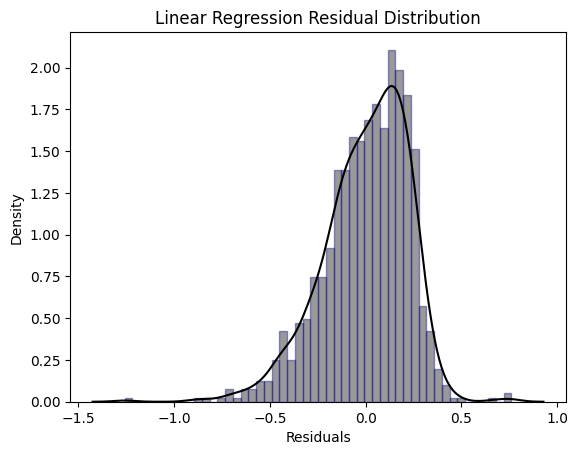

In [294]:
sns.distplot((y_test-ytest_pred),hist=True,kde=True,
             bins=50,color='black', 
             hist_kws={'edgecolor':'darkblue'})
plt.title('Linear Regression Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# **Poly Regression**

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(include_bias=False)),
         ('LiReg', LinearRegression())]
parameters = {"poly__degree":[2]}
pipeline = Pipeline(steps)
poly_grid = GridSearchCV(pipeline, parameters, cv=3, scoring='r2', verbose= True)
poly_grid.fit(X_train, y_train)
print('best order is :', poly_grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
best order is : {'poly__degree': 2}


In [296]:
polyytest_pred= poly_grid.predict(X_test)
polymae= mean_absolute_error(y_test, polyytest_pred)
polymse= mean_squared_error(y_test, polyytest_pred, squared= True)
polyr2 = r2_score(y_test, polyytest_pred)
#Training
polyytr_pred = poly_grid.predict(X_train)
polymaeT = mean_absolute_error(y_train, polyytr_pred)
polymseT= mean_squared_error(y_train, polyytr_pred, squared= True)
polyr2T = r2_score(y_train, polyytr_pred)
#Form
polyresult = pd.DataFrame({'polymae':[polymaeT, polymae],
                       'polymse':[polymseT, polymse],
                       'polyr2':[polyr2T, polyr2]})
polyresult.index = ['Training', 'Testing']

In [297]:
polyresult


,polymae,polymse,polyr2
Training,1.534968e-01,3.740403e-02,8.694126e-01
Testing,1.266837e+09,4.634363e+20,-1.602789e+21


<ipython-input-298-82d20c9904c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-polyytest_pred), hist=True,kde=True,


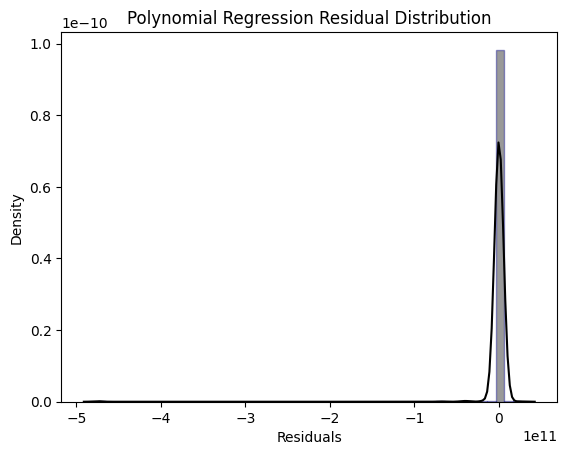

In [298]:
sns.distplot((y_test-polyytest_pred), hist=True,kde=True,
             bins=50,color='black', 
             hist_kws={'edgecolor':'darkblue'})
plt.title('Polynomial Regression Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# **KNN Regressor**

In [299]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN classifier
knn = KNeighborsRegressor()

# Define parameter grid for K
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25]}

# Use grid search to find best K value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print best K value and corresponding F1 score
print("Best K value: ", grid_search.best_params_['n_neighbors'])

Best K value:  15


In [300]:
steps = [('scaler', StandardScaler()), 
         ('knn', KNeighborsRegressor( grid_search.best_params_['n_neighbors']))]
knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=15))])

In [301]:
knnytest_pred = knn_pipeline.predict(X_test)
knnmae= mean_absolute_error(y_test, knnytest_pred)
knnmse= mean_squared_error(y_test, knnytest_pred, squared= True)
knnr2 = r2_score(y_test, knnytest_pred)
#Training
knnytr_pred = knn_pipeline.predict(X_train)
knnmaeT = mean_absolute_error(y_train, knnytr_pred)
knnmseT= mean_squared_error(y_train, knnytr_pred, squared= True)
knnr2T = r2_score(y_train, knnytr_pred)
#Form
knnresult = pd.DataFrame({'knnmae':[knnmaeT, knnmae],
                       'knnmse':[knnmseT, knnmse],
                       'knnr2':[knnr2T, knnr2]})
knnresult.index = ['Training', 'Testing']
knnresult

,knnmae,knnmse,knnr2
Training,0.193563,0.068912,0.759408
Testing,0.205904,0.072403,0.749594


<ipython-input-302-95b59feff4ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-knnytest_pred), hist=True,kde=True,


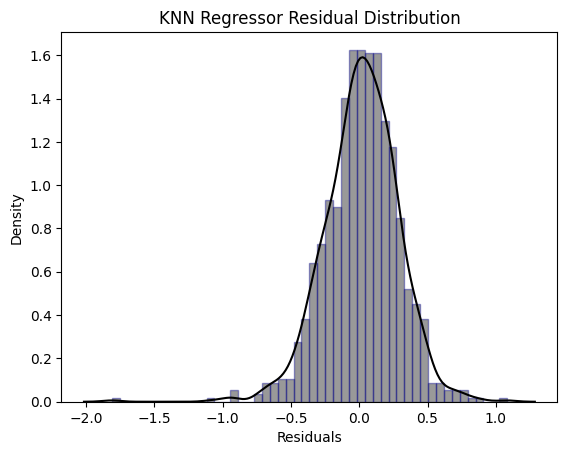

In [302]:
sns.distplot((y_test-knnytest_pred), hist=True,kde=True,
             bins=50,color='black', 
             hist_kws={'edgecolor':'darkblue'})
plt.title('KNN Regressor Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# **Ridge**

In [303]:
from sklearn.linear_model import Ridge
# define a range of alpha values to test
alpha_range = [0.1, 1, 10, 100]
# create a Ridge regression model object
ridge_model = Ridge()
# set up a grid search to find the best alpha value
param_grid = {'alpha': alpha_range}
grid = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# fit the grid search to the training data
grid.fit(X_train, y_train)

# print the best alpha value and associated mean squared error
print("Best alpha value:", grid.best_params_['alpha'])
print("Mean squared error:", abs(grid.best_score_))

Best alpha value: 10
Mean squared error: 0.8222531466331706


In [304]:
# create a Ridge regression model object
ridge_model = Ridge(alpha= grid.best_params_['alpha'])

# train the model using the training set
ridge_model.fit(X_train, y_train)

# predict on the testing set
ridgey_pred = ridge_model.predict(X_test)

# evaluate the model using mean squared error
ridgemae = mean_absolute_error(y_test,ridgey_pred)
ridgemse = mean_squared_error(y_test, ridgey_pred)
ridger2 = r2_score(y_test,ridgey_pred)
print("Mean absolute error:", ridgemae)
print("Mean squared error: ", ridgemse)
print("Ridge r2 scor3e: ", ridger2)

ridgeytr_pred = ridge_model.predict(X_train)

# evaluate the model using mean squared error
ridgemaeT = mean_absolute_error(y_train, ridgeytr_pred)
ridgemseT = mean_squared_error(y_train, ridgeytr_pred)
ridger2T = r2_score(y_train, ridgeytr_pred)
print("Mean absolute error:", ridgemaeT)
print("Training Mean squared error: ", ridgemseT)
print("Training Ridge r2 scor3e: ", ridger2T)

Mean absolute error: 0.1742598413630402
Mean squared error:  0.04881481914877875
Ridge r2 scor3e:  0.8311744706567815
Mean absolute error: 0.1737804675217888
Training Mean squared error:  0.0480764546697319
Training Ridge r2 scor3e:  0.8321523521061467


In [305]:
#Form
ridgeresult = pd.DataFrame({'ridgemae':[ridgemaeT, ridgemae],
                       'ridgemse':[ridgemseT, ridgemse],
                       'ridger2':[ridger2T, ridger2]})
ridgeresult.index = ['Training', 'Testing']
ridgeresult

,ridgemae,ridgemse,ridger2
Training,0.17378,0.048076,0.832152
Testing,0.17426,0.048815,0.831174


<ipython-input-306-1578aff41de6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-ridgey_pred), hist=True,kde=True,


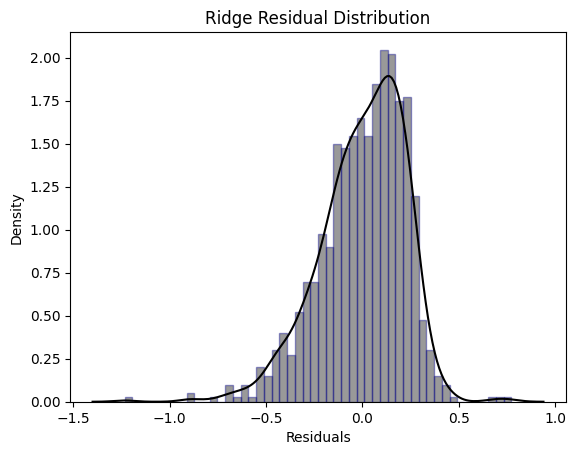

In [306]:
sns.distplot((y_test-ridgey_pred), hist=True,kde=True,
             bins=50,color='black', 
             hist_kws={'edgecolor':'darkblue'})
plt.title('Ridge Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# **Lasso**

In [307]:
from sklearn.linear_model import LassoCV
# Specify a range of alpha values to test
alphas = np.logspace(-4, 0, 100)
# create a Lasso regression model object with cross-validation
lasso_model = LassoCV(alphas=alphas, cv=5, random_state=0)

# fit the model to the training data
lasso_model.fit(X_train, y_train)

# print the best alpha value and associated mean squared error
print("Best alpha value:", lasso_model.alpha_)
print("Coefficients:", lasso_model.coef_)

Best alpha value: 0.0003351602650938841
Coefficients: [-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.65922107e-02 -9.94028460e-03 -1.87676331e-02  1.26238162e-02
  1.49881756e-02 -2.50534967e-02  0.00000000e+00  8.64077744e-02
  1.29169686e-02  9.33368700e-02 -1.18263521e-02 -4.46731828e-02
  6.71761549e-02  3.33776376e-02 -6.36128939e-02  4.40207138e-02
 -9.81868808e-03  2.44779821e-02  6.19834634e-02  0.00000000e+00
  2.05717462e-02  1.47241985e-02  3.09199575e-04  1.44068496e-02
 -7.00323895e-06  9.53621677e-04  2.00007528e-02  3.12501135e-05
  3.93810827e-01]


In [308]:
from sklearn.linear_model import Lasso
# create a Lasso regression model object
Lasso_model = Lasso(alpha = lasso_model.alpha_)
#Lasso_model = Lasso(alpha = 0.001)
# train the model using the training set
Lasso_model.fit(X_train, y_train)

# predict on the testing set
Lassoy_pred = Lasso_model.predict(X_test)

# evaluate the model using mean squared error
Lassomae = mean_absolute_error(y_test,Lassoy_pred)
Lassomse = mean_squared_error(y_test, Lassoy_pred)
Lassor2 = r2_score(y_test,Lassoy_pred)
print("Mean absolute error", Lassomae)
print("Mean squared error: ", Lassomse)
print("Lasso r2 scor3e: ", Lassor2)

Lassoytr_pred = Lasso_model.predict(X_train)
LassomaeT = mean_absolute_error(y_train, Lassoytr_pred)
LassomseT = mean_squared_error(y_train, Lassoytr_pred)
Lassor2T = r2_score(y_train, Lassoytr_pred)
print("Mean absolute error", LassomaeT)
print("Training Mean squared error: ", LassomseT)
print("Training Lasso r2 scor3e: ", Lassor2T)

Mean absolute error 0.17392450214971153
Mean squared error:  0.04867317711774194
Lasso r2 scor3e:  0.8316643381044957
Mean absolute error 0.17407388597050463
Training Mean squared error:  0.04810676407001766
Training Lasso r2 scor3e:  0.832046533954996


In [309]:
#Form
Lassoresult = pd.DataFrame({'Lassomae':[LassomaeT, Lassomae],
                       'Lassomse':[LassomseT, Lassomse],
                       'Lassor2':[Lassor2T, Lassor2]})
Lassoresult.index = ['Training', 'Testing']
Lassoresult

,Lassomae,Lassomse,Lassor2
Training,0.174074,0.048107,0.832047
Testing,0.173925,0.048673,0.831664


<ipython-input-310-6e6b0eae341a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-Lassoy_pred), hist=True,kde=True,


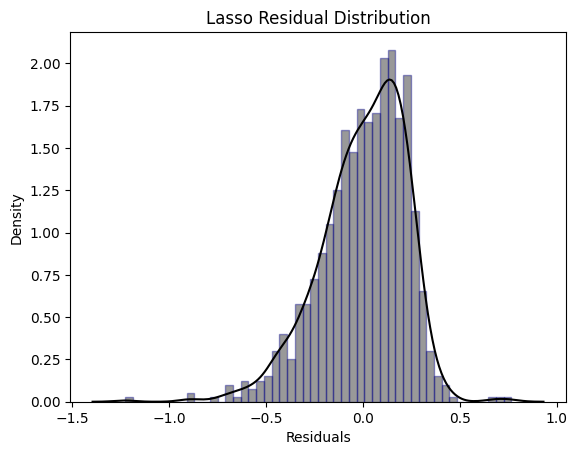

In [310]:
sns.distplot((y_test-Lassoy_pred), hist=True,kde=True,
             bins=50,color='black', 
             hist_kws={'edgecolor':'darkblue'})
plt.title('Lasso Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# ***Result***

In [311]:
Comparison_mae = pd.DataFrame({'Training_MAE':[maeT, knnmaeT, ridgemaeT, LassomaeT],
                       'Testing_MAE':[mae, knnmae, ridgemae, Lassomae]})
Comparison_mae.index = ['Linear', 'KNN','Ridge','Lasso']
Comparison_mae

,Training_MAE,Testing_MAE
Linear,0.173623,0.174723
KNN,0.193563,0.205904
Ridge,0.173780,0.174260
Lasso,0.174074,0.173925


In [312]:
Comparison_mse = pd.DataFrame({'Training_MSE':[mseT, knnmseT, ridgemseT, LassomseT],
                       'Testing_MSE':[mse, knnmse, ridgemse, Lassomse]})
Comparison_mse.index = ['Linear', 'KNN','Ridge','Lasso']
Comparison_mse

,Training_MSE,Testing_MSE
Linear,0.048028,0.049064
KNN,0.068912,0.072403
Ridge,0.048076,0.048815
Lasso,0.048107,0.048673


In [313]:
Comparison_r2 = pd.DataFrame({'Training_r2':[r2T, knnr2T, ridger2T, Lassor2T],
                       'Testing_r2':[r2, knnr2, ridger2, Lassor2]})
Comparison_r2.index = ['Linear','KNN','Ridge','Lasso']
Comparison_r2

,Training_r2,Testing_r2
Linear,0.832323,0.830312
KNN,0.759408,0.749594
Ridge,0.832152,0.831174
Lasso,0.832047,0.831664


In [314]:
df_combined = pd.concat([Comparison_mae, Comparison_mse, Comparison_r2], axis=1)
df_combined

,Training_MAE,Testing_MAE,Training_MSE,Testing_MSE,Training_r2,Testing_r2
Linear,0.173623,0.174723,0.048028,0.049064,0.832323,0.830312
KNN,0.193563,0.205904,0.068912,0.072403,0.759408,0.749594
Ridge,0.173780,0.174260,0.048076,0.048815,0.832152,0.831174
Lasso,0.174074,0.173925,0.048107,0.048673,0.832047,0.831664


In [315]:
y_test

459     4.060271
3010    3.993603
3366    4.290185
1160    5.087411
1535    4.124712
          ...   
3186    4.430579
2772    4.023207
3245    4.104460
2118    4.435449
1289    4.694645
Name: normalized_used_price, Length: 999, dtype: float64

In [316]:
Lassoy_pred

array([4.38329337, 3.90407222, 4.23356539, 4.87400447, 4.38782575,
       4.96548401, 4.80812533, 5.2883078 , 4.40003234, 4.46622631,
       3.93760634, 4.7867419 , 4.69858152, 4.25922691, 3.67104099,
       4.21983481, 3.88684802, 4.83653512, 4.72059065, 3.57814526,
       5.31581129, 4.22021775, 4.55229953, 4.88668421, 4.30889636,
       3.7961169 , 4.17862683, 2.72512714, 4.39884046, 3.59976294,
       4.23824247, 4.9370363 , 4.50088495, 3.77725053, 4.22226658,
       4.36555972, 5.04911197, 4.60338049, 4.78028877, 4.6849226 ,
       5.48226705, 5.03140509, 4.76518224, 4.16728372, 3.66080147,
       3.9542151 , 4.04636404, 4.91006666, 4.40425976, 3.81385205,
       4.2299174 , 4.56092471, 4.74801744, 4.19426194, 4.84111148,
       3.92142738, 4.56709789, 5.14374034, 4.12262442, 5.02381913,
       3.88893484, 3.68983943, 4.7287636 , 5.13759506, 4.04382944,
       4.09283495, 5.10055022, 4.00002443, 3.53509981, 5.06502161,
       4.40552654, 3.79367707, 4.52399928, 4.41066086, 4.94140

In [318]:
a=y_test-Lassoy_pred
a

459    -0.323023
3010    0.089531
3366    0.056620
1160    0.213407
1535   -0.263114
          ...   
3186   -0.152905
2772    0.237749
3245   -0.168128
2118   -0.469926
1289   -0.351408
Name: normalized_used_price, Length: 999, dtype: float64

In [321]:
a.to_csv('output.csv', index=False)